In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt



In [127]:

Table1 = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_1.csv'
Table2 = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_2%20(1).csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(Table1)
df2 = pd.read_csv(Table2)


In [128]:

df1.head()

,Code,Position,Latitute,Longitude,Tree age,Origin
0,Cri1N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China
1,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China
2,Cri2S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China
3,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China
4,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China


In [129]:
df2.head(5)

,Cri20S-2,AGCGATAG-GTTTCGGA
0,Cri12S-12,CATTGACC-AGGCGAAG
1,Cri14S-13,ATCACGAC-GTGGCCTT
2,Cri19N-3,CTGAAGCT-GTACTGAC
3,Cri9S-1,ATGTCAGA-GGCTCTGA
4,Cri11S-10,GAATTCGT-TAAGTTCC


In [130]:

df1.columns = ['Code', 'Position', 'Latitute', 'Longitude', 'Tree_age', 'Origin']
df2.columns = ['Original_Code', 'Sequence']

# Merge Table 2 into Table 1 based on the 'Code' column
merged_table = pd.merge(df1, df2, left_on='Code', right_on='Original_Code')

# Display the merged table
print("\nMerged Table:")
merged_table.head(11)


Merged Table:


,Code,Position,Latitute,Longitude,Tree_age,Origin,Original_Code,Sequence
0,Cri1N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri1N-2,TCCGCGAA-GTTTCGGA
1,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri2S-2,TCCTGAGC-CGTACGTA
2,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri3N-1,ACCCAGCA-CGTACGTA
3,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri4S-2,CGAGGCTG-GAGTGGAT
4,Cri4S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri4S-3,ACCCAGCA-GAGTGGAT
5,Cri5N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5N-2,ATGTCAGA-GAGTGGAT
6,Cri5S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5S-1,TAAGGCGA-ATTCCTTT
7,Cri5S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5S-2,TCCTGAGC-ATTCCTTT
8,Cri6S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri6S-1,AGGGTCAA-ATTCCTTT
9,Cri6S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri6S-3,ACAGTGGT-TAAGACAC


In [131]:

# Load the CSV files from the provided URLs
table_1_path = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_1.csv'
table_2_path = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_2%20(1).csv'

table_1 = pd.read_csv(table_1_path, header=1)
table_2 = pd.read_csv(table_2_path)

# Renaming the columns for clarity
table_1.columns = ['Code', 'Position', 'Latitute', 'Longitude', 'Tree_age', 'Origin']
table_2.columns = ['Code', 'Sequence']

# Merge Table 2 into Table 1 based on the 'Code' column
merged_table = pd.merge(table_1, table_2, on='Code')

# Display the merged table
print("\nMerged Table:")
merged_table.head(10)



Merged Table:


,Code,Position,Latitute,Longitude,Tree_age,Origin,Sequence
0,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TCCTGAGC-CGTACGTA
1,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACCCAGCA-CGTACGTA
2,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,CGAGGCTG-GAGTGGAT
3,Cri4S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACCCAGCA-GAGTGGAT
4,Cri5N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ATGTCAGA-GAGTGGAT
5,Cri5S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TAAGGCGA-ATTCCTTT
6,Cri5S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TCCTGAGC-ATTCCTTT
7,Cri6S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,AGGGTCAA-ATTCCTTT
8,Cri6S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACAGTGGT-TAAGACAC
9,Cri7N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TATCGTCG-ATTCCTTT


In [132]:

# Drop the specified columns from the DataFrame
merged_table_new = merged_table.drop(['Code', 'Position', 'Tree_age'], axis=1)

# Display the DataFrame after dropping the columns
print("\nMerged Table after dropping columns:")
merged_table_new.head(10)


Merged Table after dropping columns:


,Latitute,Longitude,Origin,Sequence
0,19.53,110.76,China,TCCTGAGC-CGTACGTA
1,19.53,110.76,China,ACCCAGCA-CGTACGTA
2,19.53,110.76,China,CGAGGCTG-GAGTGGAT
3,19.53,110.76,China,ACCCAGCA-GAGTGGAT
4,19.53,110.76,China,ATGTCAGA-GAGTGGAT
5,19.53,110.76,China,TAAGGCGA-ATTCCTTT
6,19.53,110.76,China,TCCTGAGC-ATTCCTTT
7,19.53,110.76,China,AGGGTCAA-ATTCCTTT
8,19.53,110.76,China,ACAGTGGT-TAAGACAC
9,19.53,110.76,China,TATCGTCG-ATTCCTTT


In [133]:
# Define a dictionary that maps the country names to numbers
country_to_number = {'China': 1, 'Malaysia': 2, 'Costa Rica': 3, 'Africa': 4}

# Replace the country names with numbers in the 'origin' column
merged_table_new['Origin'] = merged_table_new['Origin'].replace(country_to_number)

# Display the DataFrame after replacing the country names
print("\nMerged Table after replacing country names with numbers:")
print(merged_table_new.head(25))


Merged Table after replacing country names with numbers:
    Latitute  Longitude  Origin           Sequence
0      19.53     110.76       1  TCCTGAGC-CGTACGTA
1      19.53     110.76       1  ACCCAGCA-CGTACGTA
2      19.53     110.76       1  CGAGGCTG-GAGTGGAT
3      19.53     110.76       1  ACCCAGCA-GAGTGGAT
4      19.53     110.76       1  ATGTCAGA-GAGTGGAT
5      19.53     110.76       1  TAAGGCGA-ATTCCTTT
6      19.53     110.76       1  TCCTGAGC-ATTCCTTT
7      19.53     110.76       1  AGGGTCAA-ATTCCTTT
8      19.53     110.76       1  ACAGTGGT-TAAGACAC
9      19.53     110.76       1  TATCGTCG-ATTCCTTT
10     19.53     110.76       1  GCTACGCT-ATAGAGGC
11     19.53     110.76       1  ACCCAGCA-ATAGAGGC
12     19.53     110.76       1  AGGGTCAA-ATAGAGGC
13     19.53     110.76       1  CTTCGTTC-ATAGAGGC
14     19.53     110.76       1  CTGAAGCT-CCTATCCT
15     19.53     110.76       1  TAGGCATG-AGCTGAAC
16     19.53     110.76       1  CGAGGCTG-GGCTCTGA
17     19.53     110.76 

In [134]:
# Remove hyphens from the 'Sequence' column
merged_table_new['Sequence'] = merged_table_new['Sequence'].str.replace('-', '')

# Display the DataFrame after removing hyphens
print("\nMerged Table after removing hyphens from 'Sequence':")
merged_table_new.head(10)


Merged Table after removing hyphens from 'Sequence':


,Latitute,Longitude,Origin,Sequence
0,19.53,110.76,1,TCCTGAGCCGTACGTA
1,19.53,110.76,1,ACCCAGCACGTACGTA
2,19.53,110.76,1,CGAGGCTGGAGTGGAT
3,19.53,110.76,1,ACCCAGCAGAGTGGAT
4,19.53,110.76,1,ATGTCAGAGAGTGGAT
5,19.53,110.76,1,TAAGGCGAATTCCTTT
6,19.53,110.76,1,TCCTGAGCATTCCTTT
7,19.53,110.76,1,AGGGTCAAATTCCTTT
8,19.53,110.76,1,ACAGTGGTTAAGACAC
9,19.53,110.76,1,TATCGTCGATTCCTTT


In [135]:
# Select only the 'Origin' and 'Sequence' columns
merged_table_new = merged_table_new[['Origin', 'Sequence']]

# Display the DataFrame after selecting the columns
print("\nMerged Table with only 'origin' and 'Sequence':")
merged_table_new.head(200)


Merged Table with only 'origin' and 'Sequence':


,Origin,Sequence
0,1,TCCTGAGCCGTACGTA
1,1,ACCCAGCACGTACGTA
2,1,CGAGGCTGGAGTGGAT
3,1,ACCCAGCAGAGTGGAT
4,1,ATGTCAGAGAGTGGAT
...,...,...
170,4,ATGTCAGAGTGGCCTT
171,4,CGGCTATGCAGGACGT
172,4,ACAGTGGTTAGGCATG
173,4,ACCCAGCATAGGCATG


In [136]:


# Define a function to generate k-mers
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

# Create a CountVectorizer for k-mers
k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Transform the sequences into k-mer counts
X_kmers = vectorizer.fit_transform(merged_table_new['Sequence'])

# Convert to a DataFrame
X_kmers_df = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows
X_kmers_df.head(175)


,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
171,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
172,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
173,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


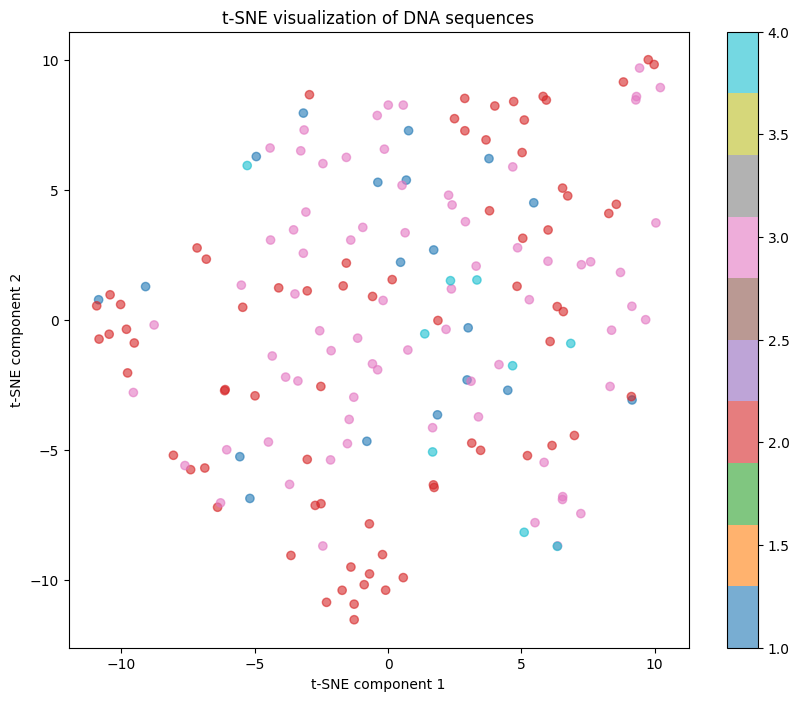

In [137]:


# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_kmers_df)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Origin'] = merged_table_new['Origin']

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=tsne_df['Origin'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title("t-SNE visualization of DNA sequences")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()


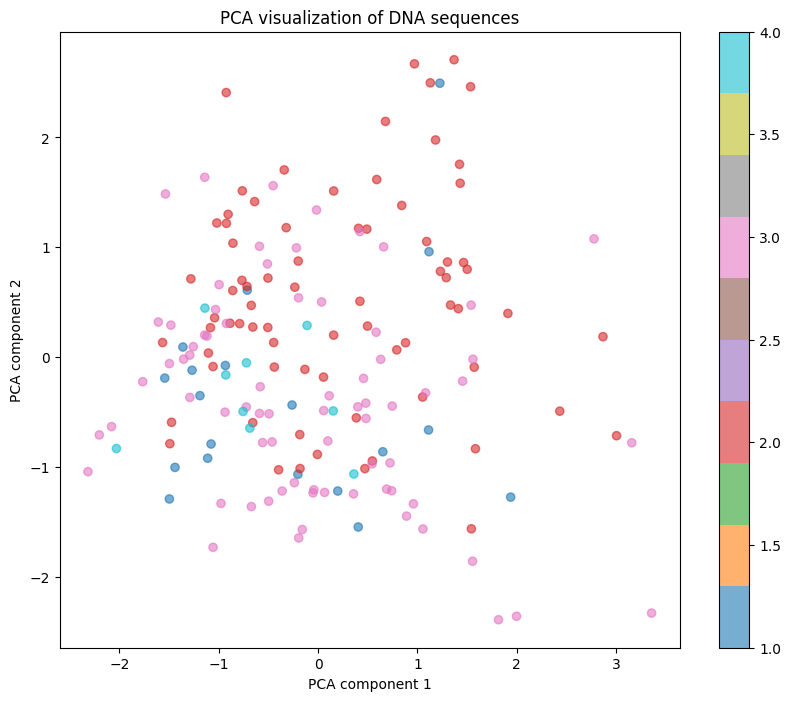

In [138]:
# Apply PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmers_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])
pca_df['Origin'] = merged_table_new['Origin']

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['Origin'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title("PCA visualization of DNA sequences")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


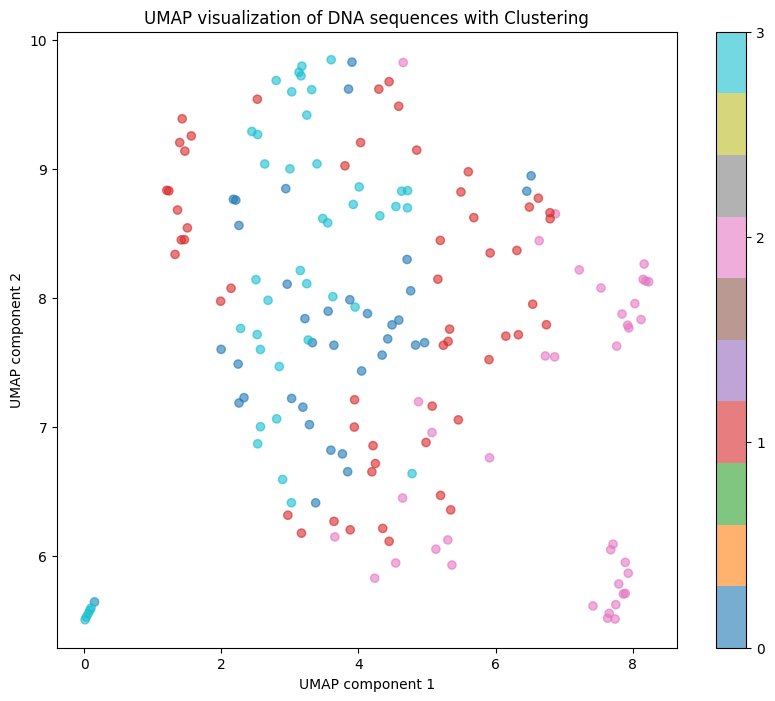

In [139]:

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming there are 4 clusters based on the 'Origin'
clusters = kmeans.fit_predict(X_kmers_df)

# Add the cluster labels to the DataFrame
X_kmers_df['Cluster'] = clusters

# Apply UMAP for visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_kmers_df.drop(columns='Cluster'))

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['Cluster'] = clusters

# Plot the UMAP results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP 1'], umap_df['UMAP 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.title("UMAP visualization of DNA sequences with Clustering")
plt.xlabel("UMAP component 1")
plt.ylabel("UMAP component 2")
plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


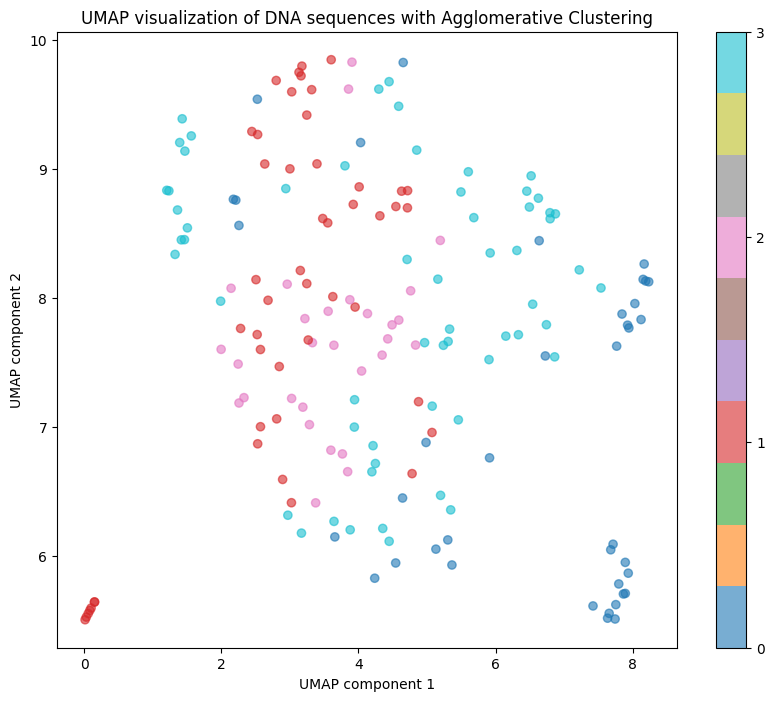

In [140]:


# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
clusters_agg = agg_clustering.fit_predict(X_kmers_df)

# Add the cluster labels to the DataFrame
X_kmers_df['Cluster'] = clusters_agg

# Apply UMAP for visualization with fine-tuned parameters
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_kmers_df.drop(columns='Cluster'))

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['Cluster'] = clusters_agg

# Plot the UMAP results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP 1'], umap_df['UMAP 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.title("UMAP visualization of DNA sequences with Agglomerative Clustering")
plt.xlabel("UMAP component 1")
plt.ylabel("UMAP component 2")
plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


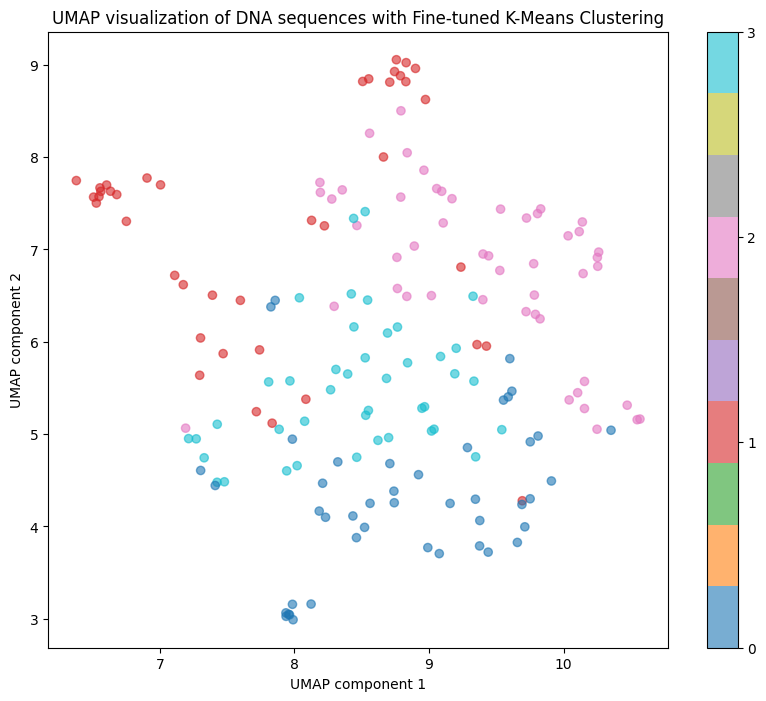

In [141]:


# Apply K-Means Clustering with more clusters if necessary
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_kmers_df)

# Add the cluster labels to the DataFrame
X_kmers_df['Cluster'] = clusters

# Apply UMAP for visualization with fine-tuned parameters
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.0)
X_umap = umap_model.fit_transform(X_kmers_df.drop(columns='Cluster'))

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['Cluster'] = clusters

# Plot the UMAP results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP 1'], umap_df['UMAP 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.title("UMAP visualization of DNA sequences with Fine-tuned K-Means Clustering")
plt.xlabel("UMAP component 1")
plt.ylabel("UMAP component 2")
plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


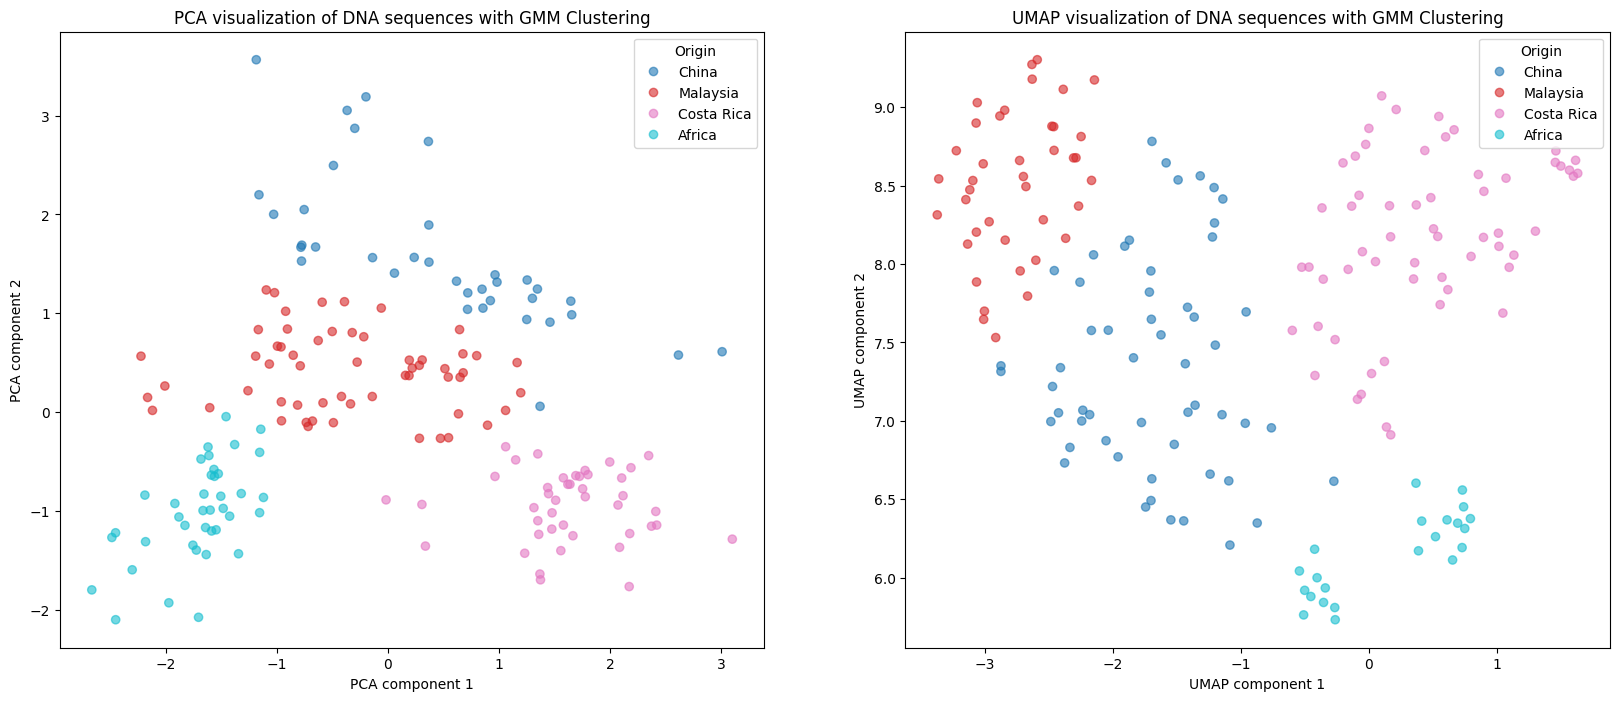

In [147]:

# Apply PCA
pca_model = PCA(n_components=2, random_state=42)
X_pca = pca_model.fit_transform(X_kmers_df)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=100, min_dist=0.0)
X_umap = umap_model.fit_transform(X_kmers_df)

# Apply Gaussian Mixture Models (GMM) Clustering on PCA
gmm_pca = GaussianMixture(n_components=4, random_state=42)
clusters_pca = gmm_pca.fit_predict(X_pca)

# Apply Gaussian Mixture Models (GMM) Clustering on UMAP
gmm_umap = GaussianMixture(n_components=4, random_state=42)
clusters_umap = gmm_umap.fit_predict(X_umap)

# Create DataFrames for the results
pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = clusters_pca
pca_df['Origin'] = merged_table_new['Origin']

umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df['Cluster'] = clusters_umap
umap_df['Origin'] = merged_table_new['Origin']

# Map cluster numbers to origins
cluster_to_origin = {
    0: 'China',
    1: 'Malaysia',
    2: 'Costa Rica',
    3: 'Africa'
}

# Apply the mapping to the DataFrames
pca_df['Origin_Label'] = pca_df['Cluster'].map(cluster_to_origin)
umap_df['Origin_Label'] = umap_df['Cluster'].map(cluster_to_origin)


# Plot the PCA and UMAP results with cluster labels and custom legend
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# PCA Plot
scatter_pca = ax[0].scatter(pca_df['Component 1'], pca_df['Component 2'], c=pca_df['Cluster'], cmap='tab10', alpha=0.6)
handles_pca, labels_pca = scatter_pca.legend_elements(prop="colors", alpha=0.6)
custom_labels_pca = [cluster_to_origin[i] for i in range(4)]
ax[0].legend(handles_pca, custom_labels_pca, title="Origin")
ax[0].set_title("PCA visualization of DNA sequences with GMM Clustering")
ax[0].set_xlabel("PCA component 1")
ax[0].set_ylabel("PCA component 2")

# UMAP Plot
scatter_umap = ax[1].scatter(umap_df['Component 1'], umap_df['Component 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
handles_umap, labels_umap = scatter_umap.legend_elements(prop="colors", alpha=0.6)
custom_labels_umap = [cluster_to_origin[i] for i in range(4)]
ax[1].legend(handles_umap, custom_labels_umap, title="Origin")
ax[1].set_title("UMAP visualization of DNA sequences with GMM Clustering")
ax[1].set_xlabel("UMAP component 1")
ax[1].set_ylabel("UMAP component 2")

plt.show()

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


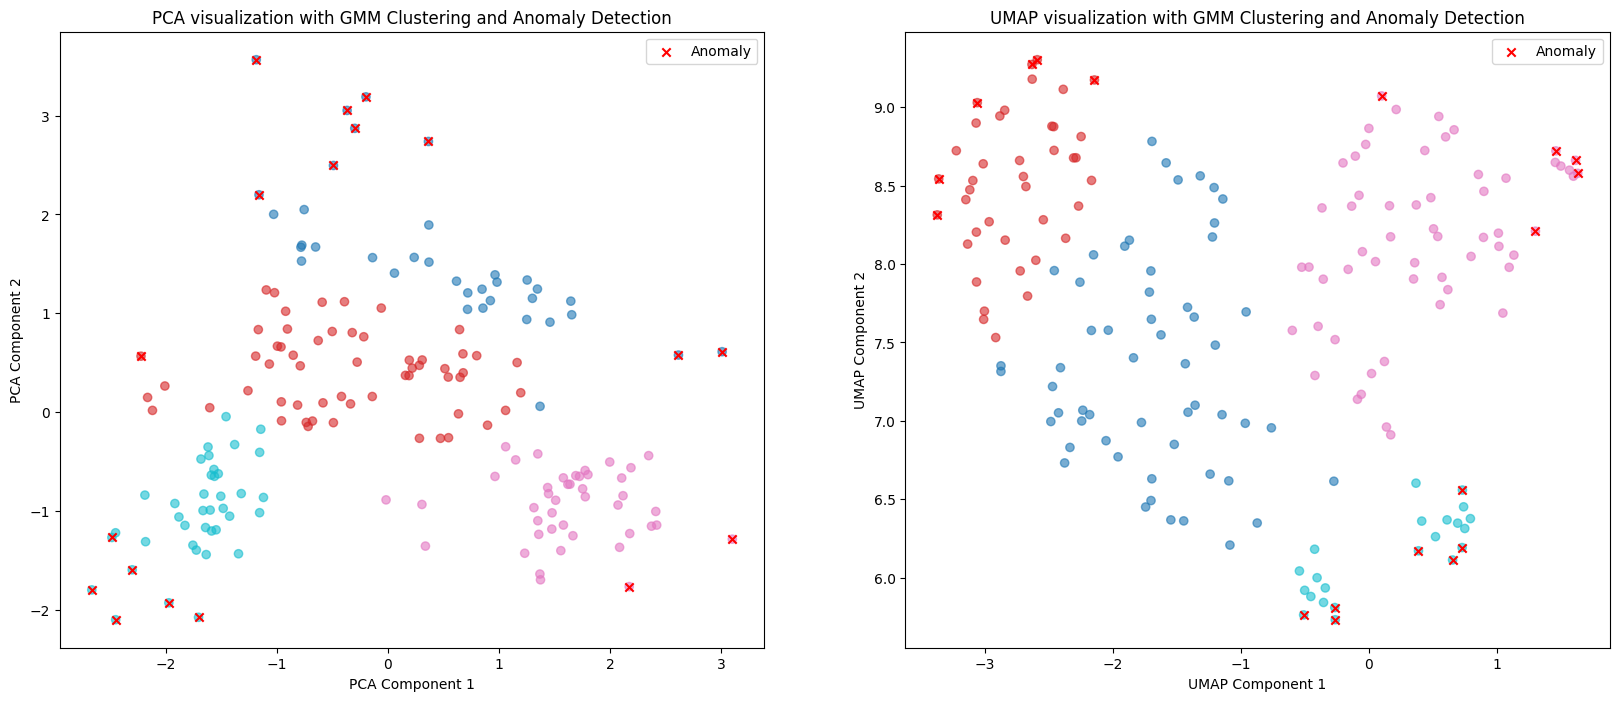

In [148]:
# Apply PCA
pca_model = PCA(n_components=2, random_state=42)
X_pca = pca_model.fit_transform(X_kmers_df)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=100, min_dist=0.0)
X_umap = umap_model.fit_transform(X_kmers_df)

# Apply Gaussian Mixture Models (GMM) Clustering on PCA
gmm_pca = GaussianMixture(n_components=4, random_state=42)
clusters_pca = gmm_pca.fit_predict(X_pca)

# Apply Gaussian Mixture Models (GMM) Clustering on UMAP
gmm_umap = GaussianMixture(n_components=4, random_state=42)
clusters_umap = gmm_umap.fit_predict(X_umap)

# Apply Isolation Forest for anomaly detection
iso_forest_pca = IsolationForest(random_state=42, contamination=0.1)
anomalies_pca = iso_forest_pca.fit_predict(X_pca)

iso_forest_umap = IsolationForest(random_state=42, contamination=0.1)
anomalies_umap = iso_forest_umap.fit_predict(X_umap)

# Create DataFrames for the results
pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = clusters_pca
pca_df['Origin'] = merged_table_new['Origin']
pca_df['Anomaly'] = anomalies_pca

umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df['Cluster'] = clusters_umap
umap_df['Origin'] = merged_table_new['Origin']
umap_df['Anomaly'] = anomalies_umap

# Map cluster numbers to origins
cluster_to_origin = {
    0: 'China',
    1: 'Malaysia',
    2: 'Costa Rica',
    3: 'Africa'
}

# Apply the mapping to the DataFrames
pca_df['Origin_Label'] = pca_df['Cluster'].map(cluster_to_origin)
umap_df['Origin_Label'] = umap_df['Cluster'].map(cluster_to_origin)

# Plot the PCA results with anomalies
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].scatter(pca_df['Component 1'], pca_df['Component 2'], c=pca_df['Cluster'], cmap='tab10', alpha=0.6)
axes[0].scatter(pca_df.loc[pca_df['Anomaly'] == -1, 'Component 1'], pca_df.loc[pca_df['Anomaly'] == -1, 'Component 2'], c='red', marker='x', label='Anomaly')
axes[0].set_title("PCA visualization with GMM Clustering and Anomaly Detection")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
axes[0].legend()

# Plot the UMAP results with anomalies
axes[1].scatter(umap_df['Component 1'], umap_df['Component 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
axes[1].scatter(umap_df.loc[umap_df['Anomaly'] == -1, 'Component 1'], umap_df.loc[umap_df['Anomaly'] == -1, 'Component 2'], c='red', marker='x', label='Anomaly')
axes[1].set_title("UMAP visualization with GMM Clustering and Anomaly Detection")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")
axes[1].legend()

plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Temp\ipykernel_9724\2162784041.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df_cleaned['Origin_Label'] = pca_df_cleaned['Cluster'].map(cluster_to_origin)
C:\Users\Abdul\AppData\Local\Temp\ipykernel_9724\2162784041.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

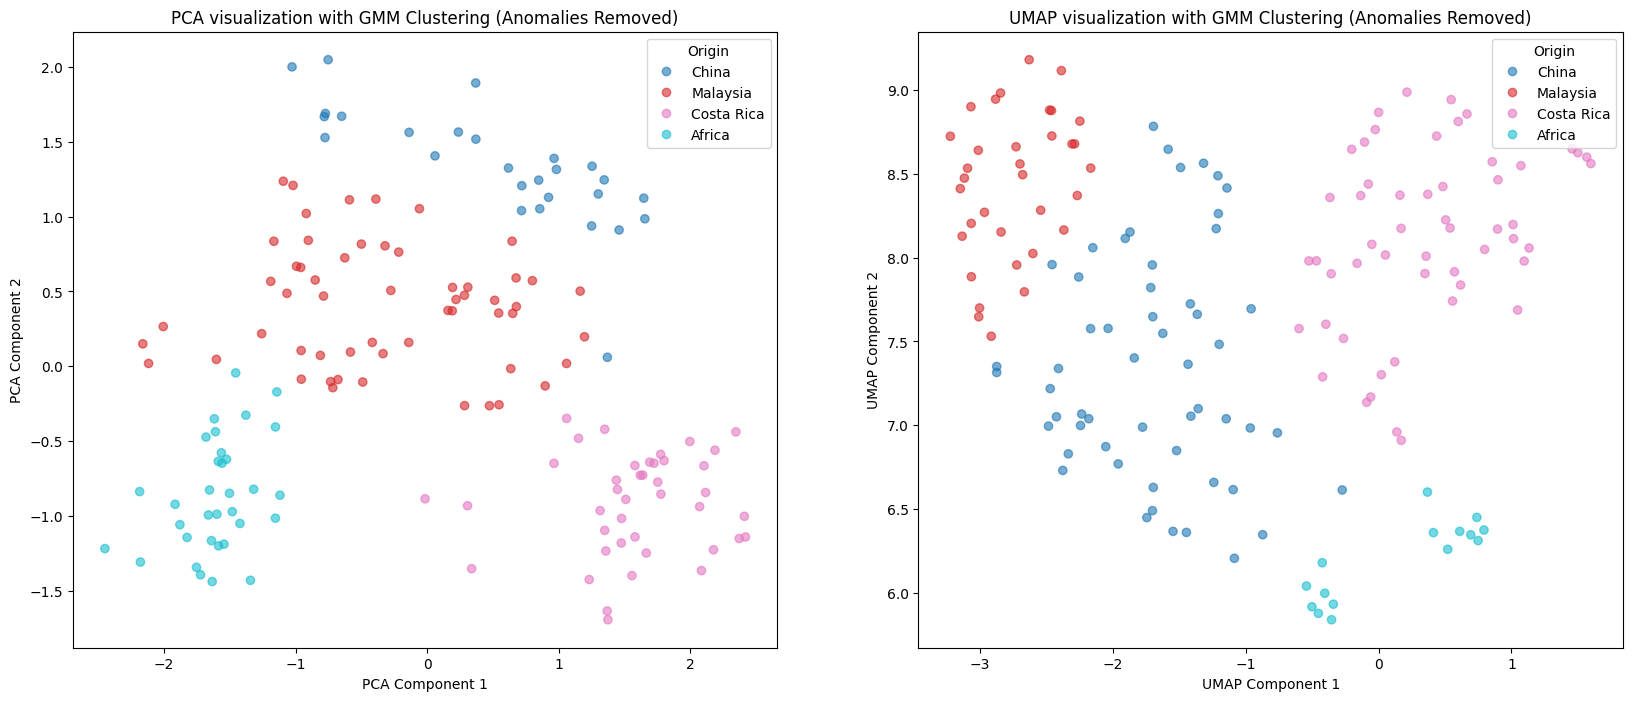

In [149]:
# Apply PCA
pca_model = PCA(n_components=2, random_state=42)
X_pca = pca_model.fit_transform(X_kmers_df)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=100, min_dist=0.0)
X_umap = umap_model.fit_transform(X_kmers_df)

# Apply Gaussian Mixture Models (GMM) Clustering on PCA
gmm_pca = GaussianMixture(n_components=4, random_state=42)
clusters_pca = gmm_pca.fit_predict(X_pca)

# Apply Gaussian Mixture Models (GMM) Clustering on UMAP
gmm_umap = GaussianMixture(n_components=4, random_state=42)
clusters_umap = gmm_umap.fit_predict(X_umap)

# Apply Isolation Forest for anomaly detection
iso_forest_pca = IsolationForest(random_state=42, contamination=0.1)
anomalies_pca = iso_forest_pca.fit_predict(X_pca)

iso_forest_umap = IsolationForest(random_state=42, contamination=0.1)
anomalies_umap = iso_forest_umap.fit_predict(X_umap)

# Create DataFrames for the results
pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = clusters_pca
pca_df['Origin'] = merged_table_new['Origin']
pca_df['Anomaly'] = anomalies_pca

umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df['Cluster'] = clusters_umap
umap_df['Origin'] = merged_table_new['Origin']
umap_df['Anomaly'] = anomalies_umap

# Remove anomalies
pca_df_cleaned = pca_df[pca_df['Anomaly'] != -1]
umap_df_cleaned = umap_df[umap_df['Anomaly'] != -1]

# Map cluster numbers to origins
cluster_to_origin = {
    0: 'China',
    1: 'Malaysia',
    2: 'Costa Rica',
    3: 'Africa'
}

# Apply the mapping to the cleaned DataFrames
pca_df_cleaned['Origin_Label'] = pca_df_cleaned['Cluster'].map(cluster_to_origin)
umap_df_cleaned['Origin_Label'] = umap_df_cleaned['Cluster'].map(cluster_to_origin)

# Plot the PCA results without anomalies
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].legend(handles_pca, custom_labels_pca, title="Origin")
axes[0].scatter(pca_df_cleaned['Component 1'], pca_df_cleaned['Component 2'], c=pca_df_cleaned['Cluster'], cmap='tab10', alpha=0.6)
axes[0].set_title("PCA visualization with GMM Clustering (Anomalies Removed)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# Plot the UMAP results without anomalies
axes[1].legend(handles_umap, custom_labels_umap, title="Origin")
axes[1].scatter(umap_df_cleaned['Component 1'], umap_df_cleaned['Component 2'], c=umap_df_cleaned['Cluster'], cmap='tab10', alpha=0.6)
axes[1].set_title("UMAP visualization with GMM Clustering (Anomalies Removed)")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")

plt.show()